# Trabajo Práctico 1

# Ejercicio 1 

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1) a) Representación gráfica de las redes

Importación de datos

In [3]:
G1=nx.read_edgelist('yeast_Y2H.txt')
G2=nx.read_edgelist('yeast_LIT.txt')
G3=nx.read_edgelist('yeast_AP-MS.txt')


Graficación

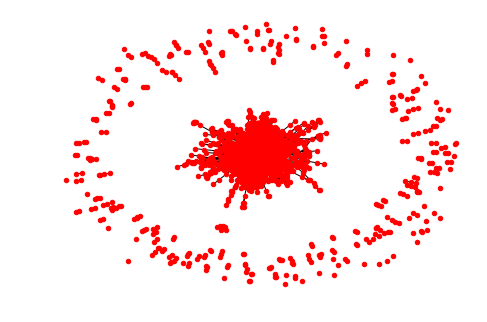

In [5]:
nx.draw(G1, with_labels=False, font_weight='bold',node_size=20)
plt.show()

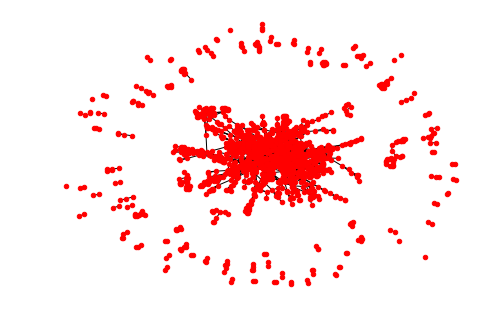

In [6]:
nx.draw(G2, with_labels=False, font_weight='bold',node_size=20)
plt.show()

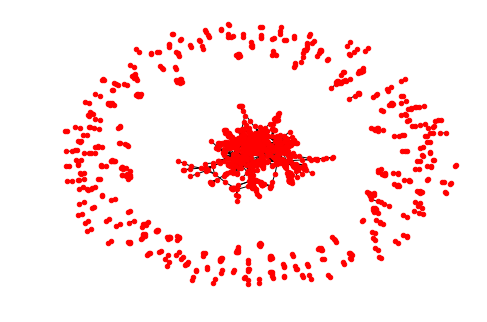

In [7]:
nx.draw(G3, with_labels=False, font_weight='bold',node_size=20)
plt.show()

b) Tabla con características de las redes

i) Número total de nodos 

In [7]:
nodos=[G1.number_of_nodes(),G2.number_of_nodes(),G3.number_of_nodes()]
nodos

[2018, 1536, 1622]

ii) Número de enlaces

In [8]:
enlaces=[G1.number_of_edges(),G2.number_of_edges(),G3.number_of_edges()]
enlaces

[2930, 2925, 9070]

Protein Interactions	Proteins	Binding interactions	Undirected

A protein-protein interaction network, where two proteins are connected if there is experimental evidence that they can bind to each other in the cell

In [21]:
dirigibilidad= [nx.is_directed(G1),nx.is_directed(G2),nx.is_directed(G3)]
dirigibilidad

[False, False, False]

iii) Grado medio

In [23]:
### Reemplazar por N/L

grado_medio = np.round(np.true_divide(enlaces,nodos),2)
grado_medio=grado_medio.tolist()    # Lo paso a formato lista porque venimos trabajando en ese formato. 
grado_medio

[1.45, 1.9, 5.59]

Grado máximo

In [12]:
## Creo funcion que calcula el grado maximo para una dada red. 
def grado_max(red):
    cantidad_nodos = red.number_of_nodes()
    maximo = 0
    i=0
    while i<cantidad_nodos:
        if list(red.degree)[i][1]>maximo:
            maximo = list(red.degree)[i][1]
        i+=1
    return maximo

grado_maximo = [grado_max(G1),grado_max(G2),grado_max(G3)]
grado_maximo

[91, 40, 127]

Grado mínimo

In [13]:
## Creo funcion que calcula el grado minimo para una dada red. 
def grado_min(red):
    cantidad_nodos = red.number_of_nodes()
    minimo = list(red.degree)[0][1]
    i=0
    while i<cantidad_nodos:
        if list(red.degree)[i][1]<minimo:
            minimo = list(red.degree)[i][1]
        i+=1
    return minimo

grado_minimo = [grado_min(G1),grado_min(G2),grado_min(G3)]
grado_minimo

[1, 1, 1]

v) Densidad de la red

In [14]:
## Creo funcion que calcula la densidad de una dada red (red no dirigida)
def calcula_densidad(red):
    edges = float(red.number_of_edges())
    nodos = float(red.number_of_nodes())
    densidad = edges / (nodos*(nodos-1))
    return round(densidad,5)
densidad = [calcula_densidad(G1),calcula_densidad(G2),calcula_densidad(G3)]
densidad

[0.00072, 0.00124, 0.00345]

vi)
Coeficiente de clustering global

In [15]:
clustering_global = [round(nx.transitivity(G1),2),round(nx.transitivity(G2),2),round(nx.transitivity(G3),2)]
clustering_global

[0.02, 0.35, 0.62]

Coeficiente de clustering local

In [16]:
clustering_local = [round(nx.average_clustering(G1),2),round(nx.average_clustering(G2),2),round(nx.average_clustering(G3),2)]
clustering_local

[0.05, 0.29, 0.55]

vii) Diámetro de la red

In [19]:
componente_gigante = [max(nx.connected_components(G1), key=len),max(nx.connected_components(G2), key=len),max(nx.connected_components(G3), key=len)]
grafo_componente_gigante = [G1.subgraph(componente_gigante[0]),G2.subgraph(componente_gigante[1]),G3.subgraph(componente_gigante[2])]
diametro = [nx.diameter(grafo_componente_gigante[0]),nx.diameter(grafo_componente_gigante[1]),nx.diameter(grafo_componente_gigante[2])]
diametro

[14, 19, 15]

Tabla que agrupa todos los resultados del inciso b)

In [22]:
# FALTA EL DIAMETRO 
tabla = pd.DataFrame(columns=['Red 1','Red 2','Red 3'], index=['N','L','Dirigibilidad','Grado medio','Grado maximo','Grado minimo','Densidad','Diametro'])
tabla.loc['N'] = pd.Series({'Red 1':nodos[0], 'Red 2':nodos[1], 'Red 3':nodos[2]})
tabla.loc['L'] = pd.Series({'Red 1':enlaces[0], 'Red 2':enlaces[1], 'Red 3':enlaces[2]})
tabla.loc['Dirigibilidad'] = pd.Series({'Red 1':dirigibilidad[0], 'Red 2':dirigibilidad[1], 'Red 3':dirigibilidad[2]})
tabla.loc['Grado medio'] = pd.Series({'Red 1':grado_medio[0], 'Red 2':grado_medio[1], 'Red 3':grado_medio[2]})
tabla.loc['Grado maximo'] = pd.Series({'Red 1':grado_maximo[0], 'Red 2':grado_maximo[1], 'Red 3':grado_maximo[2]})
tabla.loc['Grado minimo'] = pd.Series({'Red 1':grado_minimo[0], 'Red 2':grado_minimo[1], 'Red 3':grado_minimo[2]})
tabla.loc['Densidad'] = pd.Series({'Red 1':densidad[0], 'Red 2':densidad[1], 'Red 3':densidad[2]})
tabla.loc['C global'] = pd.Series({'Red 1':clustering_global[0], 'Red 2':clustering_global[1], 'Red 3':clustering_global[2]})
tabla.loc['C local'] = pd.Series({'Red 1':clustering_local[0], 'Red 2':clustering_local[1], 'Red 3':clustering_local[2]})
tabla.loc['C local'] = pd.Series({'Red 1':clustering_local[0], 'Red 2':clustering_local[1], 'Red 3':clustering_local[2]})
tabla.loc['Diametro'] = pd.Series({'Red 1':diametro[0], 'Red 2':diametro[1], 'Red 3':diametro[2]})
tabla

,Red 1,Red 2,Red 3
N,2018,1536,1622
L,2930,2925,9070
Dirigibilidad,False,False,False
Grado medio,1.45,1.9,5.59
Grado maximo,91,40,127
Grado minimo,1,1,1
Densidad,0.00072,0.00124,0.00345
Diametro,14,19,15
C global,0.02,0.35,0.62
C local,0.05,0.29,0.55
